# `nuScenes` Tutorial

## Resources:
 * [Official nuScenes devkit tutorial](https://github.com/nutonomy/nuscenes-devkit/blob/master/python-sdk/tutorial.ipynb)
 * [Explore nuScenes data](https://www.nuscenes.org/explore/scene-0061/0)
 * [arXiv:1903.11027 nuScenes: A multimodal dataset for autonomous driving](https://arxiv.org/abs/1903.11027)

## Import Packages

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from nuscenes.nuscenes import NuScenes

## Load nuScenes Data

In [3]:
nusc = NuScenes(version='v1.0-mini', dataroot='../../../../TMP/nuscenes_data', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 1.5 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


nuScenes is a large scale database that consists of 1000 scenes of approximately 20 seconds each.

Let's list scenese we have in the loaded `mini` sample - only 10 scenes:

In [4]:
nusc.list_scenes()

scene-0061, Parked truck, construction, intersectio... [18-07-24 03:28:47]   19s, singapore-onenorth, #anns:4622
scene-0103, Many peds right, wait for turning car, ... [18-08-01 19:26:43]   19s, boston-seaport, #anns:2046
scene-0655, Parking lot, parked cars, jaywalker, be... [18-08-27 15:51:32]   20s, boston-seaport, #anns:2332
scene-0553, Wait at intersection, bicycle, large tr... [18-08-28 20:48:16]   20s, boston-seaport, #anns:1950
scene-0757, Arrive at busy intersection, bus, wait ... [18-08-30 19:25:08]   20s, boston-seaport, #anns:592
scene-0796, Scooter, peds on sidewalk, bus, cars, t... [18-10-02 02:52:24]   20s, singapore-queensto, #anns:708
scene-0916, Parking lot, bicycle rack, parked bicyc... [18-10-08 07:37:13]   20s, singapore-queensto, #anns:2387
scene-1077, Night, big street, bus stop, high speed... [18-11-21 11:39:27]   20s, singapore-hollandv, #anns:890
scene-1094, Night, after rain, many peds, PMD, ped ... [18-11-21 11:47:27]   19s, singapore-hollandv, #anns:1762
sc

First scene metadata:

In [5]:
scene0 = nusc.scene[0]
scene0

{'token': 'cc8c0bf57f984915a77078b10eb33198',
 'log_token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
 'nbr_samples': 39,
 'first_sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'last_sample_token': 'ed5fc18c31904f96a8f0dbb99ff069c0',
 'name': 'scene-0061',
 'description': 'Parked truck, construction, intersection, turn left, following a van'}

**Sample** is an annotated keyframe of a scene at a given timestamp.

First annotated sample in first scene:

In [6]:
# get token
sample00_token = scene0['first_sample_token']
# get sample
sample00 = nusc.get('sample', sample00_token)
sample00

{'token': 'ca9a282c9e77460f8360f564131a8af5',
 'timestamp': 1532402927647951,
 'prev': '',
 'next': '39586f9d59004284a7114a68825e8eec',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
  'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
  'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
  'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
  'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
  'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
  'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
  'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
  'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
  'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
  'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
  'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'},
 'anns': ['ef63a697930c4b20a6b9791f423351da',
  '6b89da9bf1f84fd6a5fbe1c3b236f809',
  '924ee6ac1fed440a9d9e3720aac635a0',
  '91e3608f55174a319

Sample consists of **data** and **annotation**. Better formated list of data and annotated objects is available with `list_sample`:

In [7]:
nusc.list_sample(sample00['token'])

Sample: ca9a282c9e77460f8360f564131a8af5

sample_data_token: 37091c75b9704e0daa829ba56dfa0906, mod: radar, channel: RADAR_FRONT
sample_data_token: 11946c1461d14016a322916157da3c7d, mod: radar, channel: RADAR_FRONT_LEFT
sample_data_token: 491209956ee3435a9ec173dad3aaf58b, mod: radar, channel: RADAR_FRONT_RIGHT
sample_data_token: 312aa38d0e3e4f01b3124c523e6f9776, mod: radar, channel: RADAR_BACK_LEFT
sample_data_token: 07b30d5eb6104e79be58eadf94382bc1, mod: radar, channel: RADAR_BACK_RIGHT
sample_data_token: 9d9bf11fb0e144c8b446d54a8a00184f, mod: lidar, channel: LIDAR_TOP
sample_data_token: e3d495d4ac534d54b321f50006683844, mod: camera, channel: CAM_FRONT
sample_data_token: aac7867ebf4f446395d29fbd60b63b3b, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: 79dbb4460a6b40f49f9c150cb118247e, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: 03bea5763f0f4722933508d5999c5fd8, mod: camera, channel: CAM_BACK
sample_data_token: 43893a033f9c46d4a51b5e08a67a1eb7, mod: camera, channel:

**Data** collected from all sensors is accessible with `data` keyword:

In [8]:
sample00['data']

{'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
 'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
 'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
 'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
 'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
 'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
 'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
 'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
 'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
 'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
 'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
 'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'}

Let's take a look at the data of a sample taken from `CAM_FRONT`:

In [9]:
sample00_cam_front = nusc.get('sample_data', sample00['data']['CAM_FRONT'])
sample00_cam_front

{'token': 'e3d495d4ac534d54b321f50006683844',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': 'e3d495d4ac534d54b321f50006683844',
 'calibrated_sensor_token': '1d31c729b073425e8e0202c5c6e66ee1',
 'timestamp': 1532402927612460,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg',
 'prev': '',
 'next': '68e8e98cf7b0487baa139df808641db7',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

We can also render the data in sample at a particular sensor:

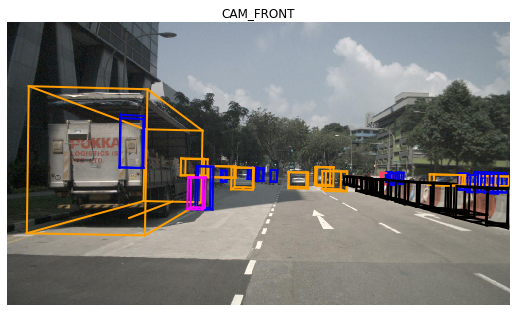

In [10]:
nusc.render_sample_data(sample00_cam_front['token'])

Let's check out `CAM_BACK` from the same sample:

In [11]:
sample00_cam_back = nusc.get('sample_data', sample00['data']['CAM_BACK'])
sample00_cam_back

{'token': '03bea5763f0f4722933508d5999c5fd8',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': '03bea5763f0f4722933508d5999c5fd8',
 'calibrated_sensor_token': '4ff47c4950f04cb4be1876bc0b028326',
 'timestamp': 1532402927637525,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_BACK/n015-2018-07-24-11-22-45+0800__CAM_BACK__1532402927637525.jpg',
 'prev': '',
 'next': '39c5557eadb443f2bfc8698605b1967a',
 'sensor_modality': 'camera',
 'channel': 'CAM_BACK'}

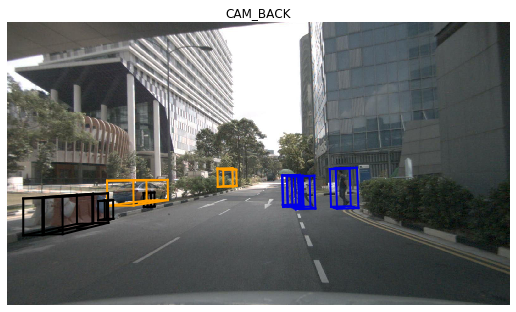

In [12]:
nusc.render_sample_data(sample00_cam_back['token'])

**Annotated objects** are accessible with `anns` keyword:

In [13]:
sample00_ann0_token = sample00['anns'][18]

Metadata of the annotated object:

In [14]:
sample00_ann0_meta =  nusc.get('sample_annotation', sample00_ann0_token)
sample00_ann0_meta

{'token': '83d881a6b3d94ef3a3bc3b585cc514f8',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'instance_token': 'e91afa15647c4c4994f19aeb302c7179',
 'visibility_token': '4',
 'attribute_tokens': ['58aa28b1c2a54dc88e169808c07331e3'],
 'translation': [409.989, 1164.099, 1.623],
 'size': [2.877, 10.201, 3.595],
 'rotation': [-0.5828819500503033, 0.0, 0.0, 0.812556848660791],
 'prev': '',
 'next': 'f3721bdfd7ee4fd2a4f94874286df471',
 'num_lidar_pts': 495,
 'num_radar_pts': 13,
 'category_name': 'vehicle.truck'}

We can render annotated object to have a closer look:

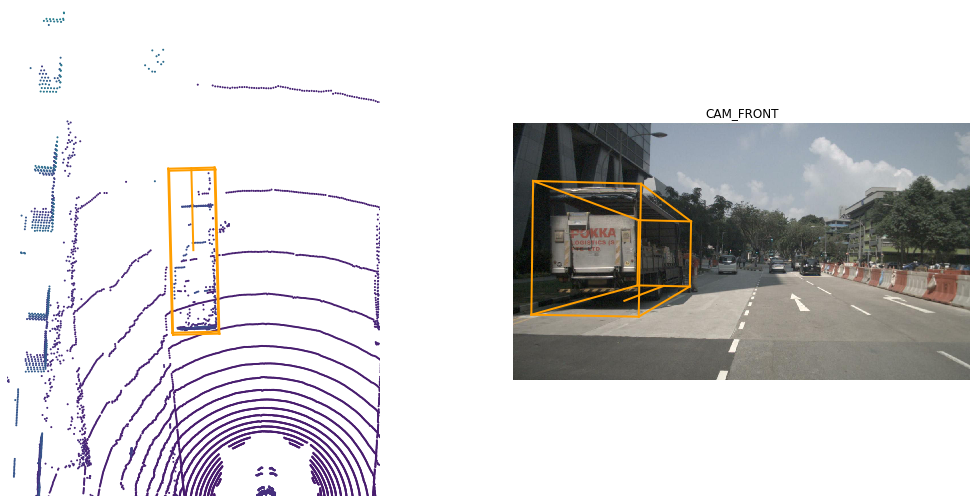

In [15]:
nusc.render_annotation(sample00_ann0_token)

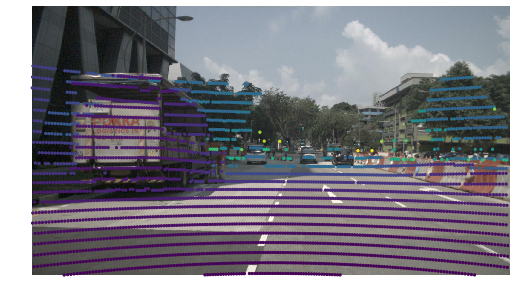

In [16]:
nusc.render_pointcloud_in_image(sample00['token'], pointsensor_channel='LIDAR_TOP')

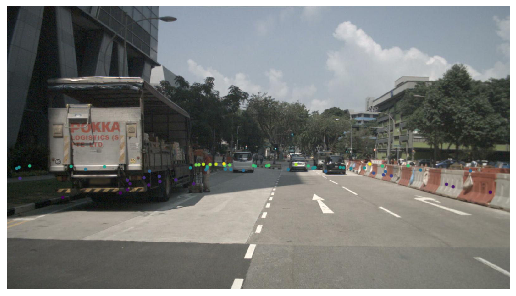

In [17]:
nusc.render_pointcloud_in_image(sample00['token'], pointsensor_channel='RADAR_FRONT')

In [18]:
scene0_token = nusc.field2token('scene', 'name', 'scene-0061')[0]

In [ ]:
nusc.render_scene(scene0_token)